#CNN - Projeto 4 - Redes Neurais Artificiais
##Gabriel Schrader Vilas Boas, RA: 150981

###Import das Bibliotecas

In [1]:
import torchvision
import torchvision.models as models
import torch.nn as nn

import torch.optim as optim
import torch
from torchvision import datasets, transforms as T

###Transformação e Separação dos dados

In [2]:
transformTrain = T.Compose([T.RandomCrop(32, padding=4), 
                         T.RandomHorizontalFlip(), 
                         T.ToTensor(), 
                         T.Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.2010),inplace=True)])

cifar10_train = datasets.CIFAR10(root='./data', train=True, download=True, transform=transformTrain)
trainloader = torch.utils.data.DataLoader(cifar10_train, batch_size=64, shuffle=True)

transformTest = T.Compose([T.ToTensor(), T.Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.2010))])

cifar10_test = datasets.CIFAR10(root='./data', train=False, download=True, transform=transformTest)
testloader = torch.utils.data.DataLoader(cifar10_test, batch_size=64, shuffle=True)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

#Para alexnet e inception, os dados precisam de transformacoes diferentes, o que é feito abaixo
#Alexnet
transform_train_alex = T.Compose([
    T.Resize(256),
    T.RandomHorizontalFlip(),
    T.ToTensor(),
    T.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test_alex = T.Compose([
    T.Resize(256),
    T.ToTensor(),
    T.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

cifar10_train_alex = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train_alex)
trainloaderAlex = torch.utils.data.DataLoader(cifar10_train_alex, batch_size=64, shuffle=True)

cifar10_test_alex = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test_alex)
testloaderAlex = torch.utils.data.DataLoader(cifar10_test_alex, batch_size=64, shuffle=True)

#Inception
transform_train_inception = T.Compose([
    T.Resize(size=(299, 299)),
    T.RandomHorizontalFlip(),
    T.ToTensor(),
    T.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test_inception = T.Compose([
    T.Resize(size=(299, 299)),
    T.ToTensor(),
    T.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

cifar10_train_inception = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train_inception)
trainloaderInception = torch.utils.data.DataLoader(cifar10_train_inception, batch_size=64, shuffle=True)

cifar10_test_inception = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test_inception)
testloaderInception = torch.utils.data.DataLoader(cifar10_test_inception, batch_size=64, shuffle=True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


###Criação dos Modelos e Adaptações

In [3]:
alexnet = models.alexnet(pretrained=True)
inception = models.inception_v3(pretrained=True)
vgg = models.vgg16(pretrained=True)
resnet = models.resnet18(pretrained=True)
resnet2 = models.resnet18(pretrained=True)

alexnet.fc = nn.Linear(512, 10)

resnet.fc = nn.Linear(512, 10)

inception.fc = nn.Linear(in_features=2048, out_features=10)

vgg.classifier[6].out_features = 10

resnet2.fc = nn.Linear(512, 10, bias=False)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth


  0%|          | 0.00/104M [00:00<?, ?B/s]

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

###Alexnet

In [15]:
if torch.cuda.is_available():
  alexnet.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(alexnet.parameters(), lr=0.001, momentum=0.9)
alexnet.train()
for epoch in range(5):
    print("epoca", epoch)
    running_loss = 0.0
    for i, data in enumerate(trainloaderAlex, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = alexnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

correct = 0
total = 0

alexnet.eval()
with torch.no_grad():
    for data in testloaderAlex:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = alexnet(inputs)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

alexnet_acuracia = 100 * correct // total
print(f'Acuracia da Alexnet: {alexnet_acuracia} %')

epoca 0
epoca 1
epoca 2
epoca 3
epoca 4
Acuracia da Alexnet: 89 %


###InceptionV3

In [5]:
if torch.cuda.is_available():
  inception.cuda()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(inception.parameters(), lr=0.001, momentum=0.9)
inception.train()
for epoch in range(5):
    print("epoca", epoch)
    running_loss = 0.0
    for i, data in enumerate(trainloaderInception, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = inception(inputs)
        loss = criterion(outputs.logits, labels)
        loss.backward()
        optimizer.step()

correct = 0
total = 0

inception.eval()
with torch.no_grad():
    for data in testloaderInception:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = inception(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

inception_acuracia = 100 * correct // total
print(f'Acuracia da Inception: {inception_acuracia} %')

epoca 0


KeyboardInterrupt: ignored

###VGG

In [ ]:
if torch.cuda.is_available():
  vgg.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(vgg.parameters(), lr=0.001, momentum=0.9)
vgg.train()
for epoch in range(5):
    print("epoca", epoch)
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = vgg(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

correct = 0
total = 0

vgg.eval()
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = vgg(inputs)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

vgg_acuracia = 100 * correct // total
print(f'Acuracia da VGG: {vgg_acuracia} %')

epoca 0
epoca 1
epoca 2
epoca 3
epoca 4
Acuracia da VGG: 83 %


###Resnet

In [ ]:
if torch.cuda.is_available():
  resnet.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet.parameters(), lr=0.001, momentum=0.9)
resnet.train()
for epoch in range(5):
    print("epoca", epoch)
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = resnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

correct = 0
total = 0

resnet.eval()
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = resnet(inputs)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
resnet_acuracia = 100 * correct // total
print(f'Acuracia da Resnet: {resnet_acuracia} %')

epoca 0
epoca 1
epoca 2
epoca 3
epoca 4
Acuracia da Resnet: 81 %


##Resnet Topologia 2

In [14]:
if torch.cuda.is_available():
  resnet2.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet2.parameters(), lr=0.001, momentum=0.9)
resnet2.train()
for epoch in range(5):
    print("epoca", epoch)
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = resnet2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

correct = 0
total = 0

resnet2.eval()
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = resnet2(inputs)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
resnet2_acuracia = 100 * correct // total
print(f'Acuracia da Resnet 2ª topologia: {resnet2_acuracia} %')

epoca 0
epoca 1
epoca 2
epoca 3
epoca 4
Acuracia da Resnet 2ª topologia: 80 %


##Matriz de Confusão 
Serão geradas matrizes de confusão para o modelo Alexnet e Inception, os quais apresentaram, respectivamente, 89% e 96% de acurácia.

###Alexnet

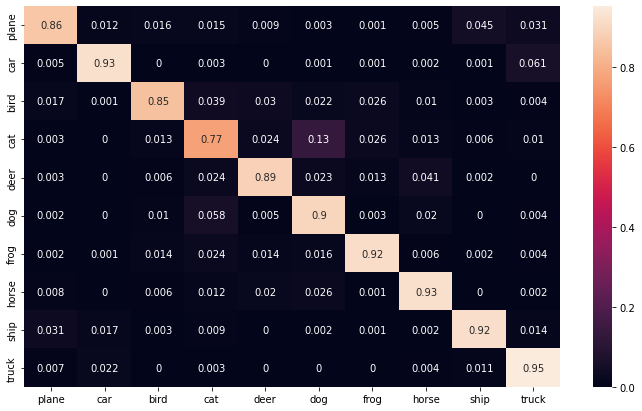

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

y_pred = []
y_true = []

for data in testloaderAlex:
  inputs, labels = data
  inputs, labels = inputs.to(device), labels.to(device)

  outputs = alexnet(inputs)
  outputs = (torch.max(torch.exp(outputs), 1)[1]).data.cpu().numpy()
  y_pred.extend(outputs)
  
  labels = labels.data.cpu().numpy()
  y_true.extend(labels)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)

###Inception

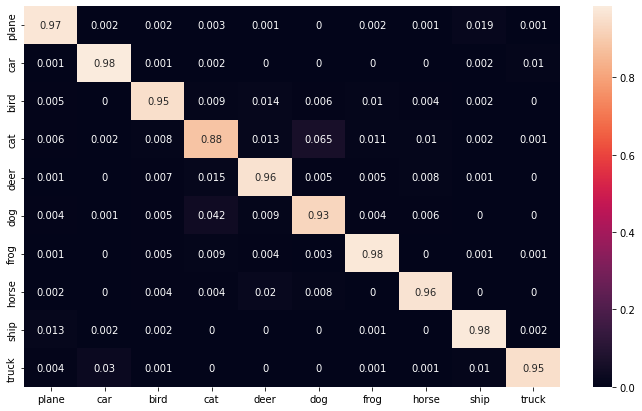

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

y_pred = []
y_true = []

for data in testloaderInception:
  inputs, labels = data
  inputs, labels = inputs.to(device), labels.to(device)
  outputs = inception(inputs)
  outputs = (torch.max(torch.exp(outputs.logits), 1)[1]).data.cpu().numpy()
  y_pred.extend(outputs)
  
  labels = labels.data.cpu().numpy()
  y_true.extend(labels)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)